### Setting up the environment

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

### Data Exploration

In [3]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/camvid/valid.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/codes.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images')]

In [4]:
path_lbl = path/'labels'
path_img = path/'images'

In [5]:
file_names = get_image_files(path_img)
file_names[:5]

[PosixPath('/home/jupyter/.fastai/data/camvid/images/0001TP_007470.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0001TP_008700.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0001TP_010320.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/Seq05VD_f02310.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0001TP_008310.png')]

In [6]:
label_names = get_image_files(path_lbl)
label_names[:5]

[PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_07170_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0001TP_007170_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0001TP_006690_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_06600_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/Seq05VD_f04050_P.png')]

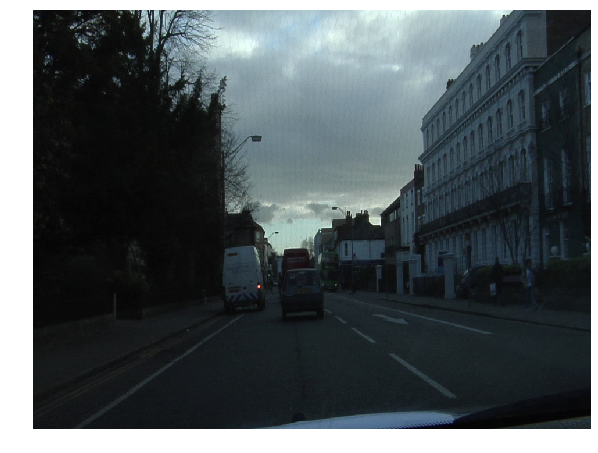

In [7]:
test_img = file_names[0]
img = open_image(test_img)
img.show(figsize=(10,8))

In [8]:
get_label = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [9]:
get_label(test_img)

PosixPath('/home/jupyter/.fastai/data/camvid/labels/0001TP_007470_P.png')

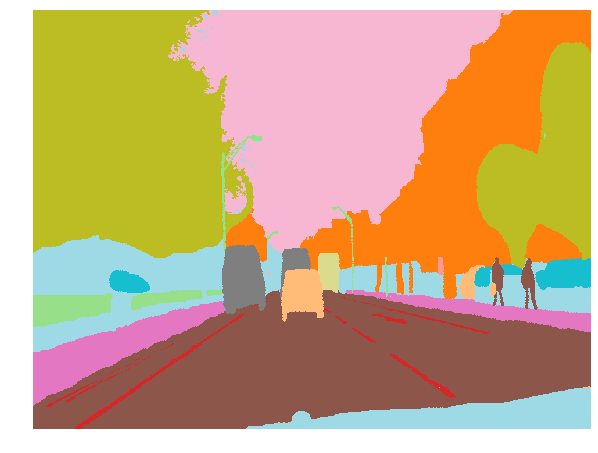

In [10]:
mask = open_mask(get_label(test_img))
mask.show(figsize=(10,8), alpha=1)

In [11]:
src_size = np.array(mask.shape[1:])
src_size, mask.data

(array([720, 960]), tensor([[[26, 26, 26,  ...,  4,  4,  4],
          [26, 26, 26,  ...,  4,  4,  4],
          [26, 26, 26,  ...,  4,  4,  4],
          ...,
          [17, 17, 17,  ..., 30, 30, 30],
          [17, 17, 17,  ..., 30, 30, 30],
          [17, 17, 17,  ..., 30, 30, 30]]]))

In [20]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

### Dataset creation

In [21]:
size = src_size//2
bs = 8

In [22]:
src = (SegmentationItemList
       .from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_label, classes=codes))
src

LabelLists;

Train: LabelList
y: SegmentationLabelList (600 items)
[ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960)]...
Path: /home/jupyter/.fastai/data/camvid/images
x: SegmentationItemList (600 items)
[Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960)]...
Path: /home/jupyter/.fastai/data/camvid/images;

Valid: LabelList
y: SegmentationLabelList (101 items)
[ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960)]...
Path: /home/jupyter/.fastai/data/camvid/images
x: SegmentationItemList (101 items)
[Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960)]...
Path: /home/jupyter/.fastai/data/camvid/images;

Test: None

In [24]:
def get_data(SZ, BS):
    data = (src.transform(get_transforms(p_affine=0.8, max_lighting=0.3), size=SZ, tfm_y=True)
            .databunch(bs=BS)
            .normalize(imagenet_stats))
    return data

In [28]:
data = get_data(size, bs)

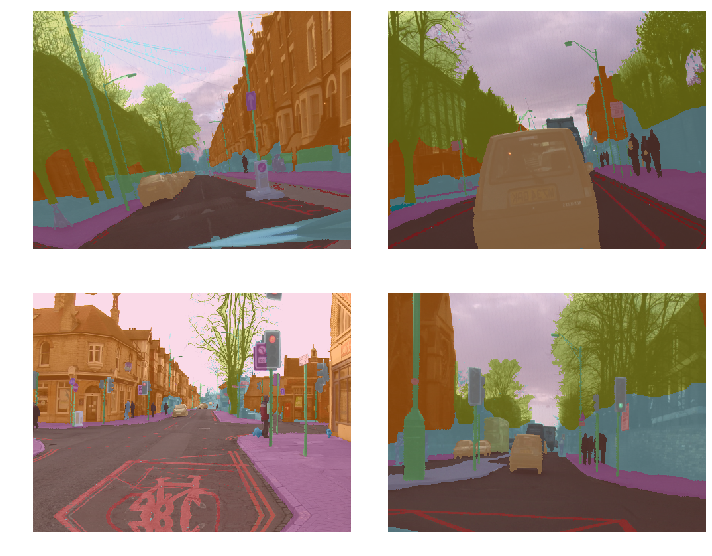

In [30]:
data.show_batch(2, figsize=(10,8))

In [ ]:
data.show_batch(2, figsize=(10,8), ds_type=DatasetType.Valid)